In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)

In [13]:
def generate_data(n):
    d = 100
    w = np.zeros(d)
    for i in range(0,10):
        w[i] = 1.0
    x0 = np.ones((n,1))
    trainx = np.random.normal(size=(n,d))
    e = np.random.random(size=(n))
    trainy = np.dot(trainx, w) + e
    trainx =np.concatenate((x0,trainx), axis=1)
    
    return trainx, trainy

In [14]:
train_x, train_y = generate_data(200)
print(train_x.shape, train_y.shape)

(200, 101) (200,)


In [3]:
y = [10,20,30,40]
x = [[1,2],[3,4],[5,6],[7,8]]
w = [2,3]
c1 = np.matmul(x,w)
c2 = np.square(c1)
c3 = np.square(y-np.matmul(x,w))
print(np.matmul(x,w))
print(y-np.matmul(x,w))
print(np.square(y-np.matmul(x,w)))
print(sum(np.square(y-np.matmul(x,w))))

[ 8 18 28 38]
[2 2 2 2]
[4 4 4 4]
16


In [30]:
def cal_loss(x,y,w,C):
    loss_no_reg = sum(np.square(y-np.matmul(x,w)))
    adjust = C * np.dot(w,w)
    loss = loss_no_reg + adjust
    return loss

In [34]:
def grad_des(x,y,w,C):
    grad = np.zeros(len(w))
    r = y - np.matmul(x,w)
    for i in range(len(w)):
        grad[i] = -2*(np.dot(r,x[:,i])) 
    temp = grad[0]
    grad = grad + 2*C*w
    grad[0] = temp
    return grad

In [37]:
def ridge_regression_GD(x,y,C):
    w = np.zeros(x.shape[1])
    step = 0.001
    num_iter = 1000
    losses = np.zeros(num_iter)
    tol = 2**(-20)
    i = 0
    loss = 100000
    while ((loss > tol) and (i < num_iter)):
        grad = grad_des(x,y,w,C)
        w = w - step * grad
        loss = cal_loss(x,y,w,C)
        losses[i] = loss
        i = i+1
    return w[1:], w[0], losses

In [38]:
n = 200
x,y = generate_data(n)
C = 1.0
w,b,losses = ridge_regression_GD(x,y,C)
print('w = ', w[0:20])
print('losses = ', losses[:50])

w =  [ 0.98025503  0.97523169  0.95234104  0.98676582  0.97135811  1.00884611
  0.9460191   1.01792443  0.94780232  1.01173493  0.02929615 -0.00419184
  0.0511782   0.03061738 -0.00638565 -0.05563992  0.06709269  0.01427351
  0.0194406   0.00946864]
losses =  [464.1134578  229.92017937 146.02658953 105.30707101  81.96437401
  67.02437608  56.71083959  49.20829751  43.5471205   39.16260909
  35.70157954  32.93001423  30.6855951   28.85163494  27.34187753
  26.09115111  25.04934999  24.17740497  23.44449615  22.82607235
  22.30241211  21.85755856  21.47851847  21.15465205  20.87720256
  20.63893011  20.43382399  20.25687505  20.10389411  19.97136636
  19.85633389  19.75630038  19.66915344  19.5931011   19.52661954
  19.46841005  19.41736334  19.37252997  19.33309569  19.29836083
  19.26772307  19.24066296  19.21673173  19.19554102  19.17675419
  19.16007896  19.14526118  19.1320795   19.12034083  19.10987655]


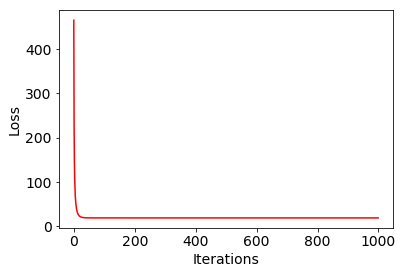

In [39]:
plt.plot(losses, 'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

In [7]:
x.shape

(200, 100)